In [145]:
import requests
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

EDA - Alojamientos Fecha: 25-10-2024 al 28-10-2024
Pasos a seguir.
* El alojamiento lo he obtenido usando la API de Booking. A través de esta pude extraer los datos con los que estaré trabajando a continuación. En cuanto a los alojamientos, estos ya se han unido en un solo Data Frame. De esta manera, podré comparar en el mismo las cosas directamente. 
He hecho cierta limpieza a medida que iba dando forma al Data Frame, pero aquí se evaluará mejor formato y descripción de los datos.

No tengo nulos ni duplicados.

Tengo 40 filas y 9 columnas.

El precio medio de hospedaje para estas fechas en Lisboa es de 554€ mientras que en Florencia es de 727€.

En cuanto a la calificación promedio, en base a 10, encontré que Florencia tiene una media de 8.77 mientras que Lisboa tiene una de 8.53.
En cuanto a la cantidad de reviews, Florencia tiene una media de 1650 que se queda muy distante de la media de Lisboa que se presenta en 3044.
* Considerando que los precios son más asequibles para Lisboa, puede que la carga histórica y cultural de Florencia eleve más los precios y que por ende más personas decidan asistir en viajes low-cost a Lisboa.
* A esto se suma que el mínimo de hospedaje en Lisboa empieza en 81€ mientras que en Florencia es 145€. También podemos observa que la mediana en ambos lugares no es tan distante, Florencia: 604.96€ y Lisboa: 514.71€. Sin embargo, tenemos un precio máximo de 1842€ en Florencia y 1001€ en Lisboa. Recalco que la riqueza cultural e histórica de Florencia juega un papel importante ya que algunos alojamientos están bastante cerca de lugares memorables de la ciudad.

In [45]:
df_florencia_lisboa = pd.read_csv('../datos/alojamientos_combinados.csv')

In [46]:
df_florencia_lisboa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ciudad               40 non-null     object 
 1   Hotel                40 non-null     object 
 2   Cantidad de reviews  40 non-null     int64  
 3   Calificación         40 non-null     float64
 4   Precio               40 non-null     float64
 5   Entrada desde        40 non-null     object 
 6   Entrada hasta        40 non-null     object 
 7   Salida desde         40 non-null     object 
 8   Salida hasta         40 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.9+ KB


Tengo que convertir las horas en formato datetime. Puedo ver que no tengo nulos

In [62]:
df_florencia_lisboa.duplicated().sum()

np.int64(0)

In [47]:
df_florencia_lisboa.head()

,Ciudad,Hotel,Cantidad de reviews,Calificación,Precio,Entrada desde,Entrada hasta,Salida desde,Salida hasta
0,Florence,Florence Heart Uffizi - Renovated and central,70,9.1,585.000000,15:00,20:00,08:00,10:00
1,Florence,Appartamento la Ninfea,195,8.9,1842.380000,14:00,19:00,07:00,10:00
2,Florence,BorgoDeGreci Apartments,468,8.7,590.630000,14:00,00:00,06:00,10:00
3,Florence,B&B Le Stanze del Duomo,6580,8.5,619.304625,14:00,21:00,08:00,11:00
4,Florence,Adler Cavalieri Hotel-Private Spa & Gym,3628,8.5,722.000000,15:00,00:00,00:00,12:00


In [48]:
df_florencia_lisboa['Precio'] = df_florencia_lisboa['Precio'].round(2)
# quitamos el exceso de ceros en el precio
#  redondeo los precios a dos decimales

In [49]:
df_florencia_lisboa.head(1)

,Ciudad,Hotel,Cantidad de reviews,Calificación,Precio,Entrada desde,Entrada hasta,Salida desde,Salida hasta
0,Florence,Florence Heart Uffizi - Renovated and central,70,9.1,585.0,15:00,20:00,08:00,10:00


In [50]:
df_florencia_lisboa.head()

,Ciudad,Hotel,Cantidad de reviews,Calificación,Precio,Entrada desde,Entrada hasta,Salida desde,Salida hasta
0,Florence,Florence Heart Uffizi - Renovated and central,70,9.1,585.00,15:00,20:00,08:00,10:00
1,Florence,Appartamento la Ninfea,195,8.9,1842.38,14:00,19:00,07:00,10:00
2,Florence,BorgoDeGreci Apartments,468,8.7,590.63,14:00,00:00,06:00,10:00
3,Florence,B&B Le Stanze del Duomo,6580,8.5,619.30,14:00,21:00,08:00,11:00
4,Florence,Adler Cavalieri Hotel-Private Spa & Gym,3628,8.5,722.00,15:00,00:00,00:00,12:00


In [52]:
df_florencia_lisboa.shape

(40, 9)

In [53]:
df_florencia_lisboa.columns

Index(['Ciudad', 'Hotel', 'Cantidad de reviews', 'Calificación', 'Precio',
       'Entrada desde', 'Entrada hasta', 'Salida desde', 'Salida hasta'],
      dtype='object')

In [54]:
df_florencia_lisboa.describe()

,Cantidad de reviews,Calificación,Precio
count,40.000000,40.000000,40.000000
mean,2347.700000,8.652500,641.281500
std,1961.433244,0.479309,341.147894
min,5.000000,7.200000,81.870000
25%,821.750000,8.400000,484.857500
50%,1557.000000,8.700000,587.815000
75%,3835.750000,8.925000,704.172500
max,6580.000000,9.500000,1842.380000


In [55]:
df_florencia_lisboa.describe(include='O')

,Ciudad,Hotel,Entrada desde,Entrada hasta,Salida desde,Salida hasta
count,40,40,40,40,40,40
unique,2,40,7,7,7,5
top,Florence,Florence Heart Uffizi - Renovated and central,14:00,00:00,00:00,12:00
freq,20,1,19,27,24,16


In [58]:
df_florencia_lisboa.groupby('Ciudad')['Precio'].mean()

Ciudad
Florence    727.991
Lisbon      554.572
Name: Precio, dtype: float64

El precio medio de hospedaje para estas fechas en Lisboa es de 554€ mientras que en Florencia es de 727€.

In [60]:
df_florencia_lisboa.groupby('Ciudad').describe().T

Ciudad                        Florence       Lisbon
Cantidad de reviews count    20.000000    20.000000
                    mean   1650.750000  3044.650000
                    std    1678.261942  2014.386710
                    min      70.000000     5.000000
                    25%     448.750000  1107.250000
                    50%    1253.500000  3312.000000
                    75%    2116.750000  4820.500000
                    max    6580.000000  5874.000000
Calificación        count    20.000000    20.000000
                    mean      8.775000     8.530000
                    std       0.378188     0.544929
                    min       7.800000     7.200000
                    25%       8.500000     8.200000
                    50%       8.800000     8.600000
                    75%       9.025000     8.825000
                    max       9.400000     9.500000
Precio              count    20.000000    20.000000
                    mean    727.991000   554.572000
                    std     412.611753   229.808998
                    min     145.000000    81.870000
                    25%     555.922500   454.050000
                    50%     604.965000   514.710000
                    75%     704.172500   672.975000
                    max    1842.380000  1001.710000

En cuanto a la calificación promedio, en base a 10, encontré que Florencia tiene una media de 8.77 mientras que Lisboa tiene una de 8.53.
En cuanto a la cantidad de reviews, Florencia tiene una media de 1650 que se queda muy distante de la media de Lisboa que se presenta en 3044.
* Considerando que los precios son más asequibles para Lisboa, puede que la carga histórica y cultural de Florencia eleve más los precios y que por ende más personas decidan asistir en viajes low-cost a Lisboa.
* A esto se suma que el mínimo de hospedaje en Lisboa empieza en 81€ mientras que en Florencia es 145€. También podemos observa que la mediana en ambos lugares no es tan distante, Florencia: 604.96€ y Lisboa: 514.71€. Sin embargo, tenemos un precio máximo de 1842€ en Florencia y 1001€ en Lisboa. Recalco que la riqueza cultural e histórica de Florencia juega un papel importante ya que algunos alojamientos están bastante cerca de lugares memorables de la ciudad.

---
* Vuelos a Florencia*

A continuación, busco la información sobre los vuelos de MAD-FLR y FLR-MAD durante las fechas del 25-10-2024 al 28-10-2024.

In [63]:
df_vuelos_florencia = pd.read_csv('../datos/vuelos_florencia_itinerario.csv')

In [67]:
df_vuelos_florencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Costo            20 non-null     float64
 1   ID Salida        20 non-null     object 
 2   Salida           20 non-null     object 
 3   ID Llegada       20 non-null     object 
 4   Llegada          20 non-null     object 
 5   Tiempo           20 non-null     int64  
 6   Paradas          20 non-null     int64  
 7   Aerolínea        20 non-null     object 
 8   Hora de Salida   20 non-null     object 
 9   Hora de Llegada  20 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.7+ KB


In [106]:
df_vuelos_florencia.describe(include='O')

,ID Salida,Salida,ID Llegada,Llegada,Aerolínea,Hora de Salida,Hora de Llegada
count,20,20,20,20,20,20,20
unique,2,2,2,2,3,10,9
top,MAD,Madrid,FLR,Florence,Vueling Airlines,2024-10-28T12:35:00,2024-10-28T15:05:00
freq,10,10,10,10,14,7,7


In [104]:
df_vuelos_florencia['Hora de Salida'].duplicated().sum()

np.int64(10)

In [105]:
df_vuelos_florencia['Hora de Llegada'].duplicated().sum()

np.int64(11)

En este caso, para Florencia tengo varios horarios duplicados pero destaco el tema de jugar con las combinaciones. Aunque el vuelo de ida pueda repetirse, este tiene una combinación con el vuelo de regreso distinto en todos los caso. Pasa lo mismo con los vuelos duplicados de regreso. 

Se puede observar claramente con los precios, como cada variación en el horario genera un cambio en los precios. A la vez, aquellos paquetes que hacen escalas, lo que significa una mayor duración del vuelo, tienen un costo menor que aquellos que tienen una trayectoria directa.

In [101]:
df_vuelos_florencia

,Costo,ID Salida,Salida,ID Llegada,Llegada,Tiempo,Paradas,Aerolínea,Hora de Salida,Hora de Llegada
0,428.00,MAD,Madrid,FLR,Florence,140,0,Vueling Airlines,2024-10-25T09:55:00,2024-10-25T12:15:00
1,428.00,FLR,Florence,MAD,Madrid,150,0,Vueling Airlines,2024-10-28T12:35:00,2024-10-28T15:05:00
2,429.00,MAD,Madrid,FLR,Florence,140,0,Vueling Airlines,2024-10-25T15:35:00,2024-10-25T17:55:00
3,429.00,FLR,Florence,MAD,Madrid,150,0,Vueling Airlines,2024-10-28T12:35:00,2024-10-28T15:05:00
4,290.00,MAD,Madrid,FLR,Florence,250,1,Vueling Airlines,2024-10-25T17:20:00,2024-10-25T21:30:00
5,290.00,FLR,Florence,MAD,Madrid,150,0,Vueling Airlines,2024-10-28T12:35:00,2024-10-28T15:05:00
6,281.68,MAD,Madrid,FLR,Florence,300,1,ITA Airways,2024-10-25T05:50:00,2024-10-25T10:50:00
7,281.68,FLR,Florence,MAD,Madrid,284,1,ITA Airways,2024-10-28T19:15:00,2024-10-28T23:59:00
8,451.98,MAD,Madrid,FLR,Florence,140,0,Vueling Airlines,2024-10-25T09:55:00,2024-10-25T12:15:00
9,451.98,FLR,Florence,MAD,Madrid,150,0,Vueling Airlines,2024-10-28T06:15:00,2024-10-28T08:45:00


In [171]:
df_vuelos_florencia.groupby('Aerolínea')['Costo'].mean()

Aerolínea
Air Europa          295.000000
ITA Airways         305.472000
Vueling Airlines    380.925714
Name: Costo, dtype: float64

In [68]:
df_vuelos_florencia.shape

(20, 10)

In [70]:
df_vuelos_florencia.columns

Index(['Costo', 'ID Salida', 'Salida', 'ID Llegada', 'Llegada', 'Tiempo',
       'Paradas', 'Aerolínea', 'Hora de Salida', 'Hora de Llegada'],
      dtype='object')

In [78]:
df_vuelos_florencia['Aerolínea'].value_counts(normalize=True) * 100

Aerolínea
Vueling Airlines    70.0
ITA Airways         25.0
Air Europa           5.0
Name: proportion, dtype: float64

Puedo observar que de las tres aerolíneas, Vueling tiene el 70% de los vuelos que se ofrecen en estas fechas de ida y vuelta. Seguidos de ITA Airways.

In [92]:
df_vuelos_florencia.duplicated().sum()

np.int64(0)

In [69]:
df_vuelos_florencia.describe()

,Costo,Tiempo,Paradas
count,20.00000,20.000000,20.00000
mean,357.76600,214.450000,0.35000
std,68.19356,103.467501,0.48936
min,281.68000,140.000000,0.00000
25%,295.00000,150.000000,0.00000
50%,328.00000,150.000000,0.00000
75%,429.00000,288.000000,1.00000
max,451.98000,450.000000,1.00000


En cuanto a media del costo de vuelos, ida y vuelta, encontré un promedio de 357€ para Florencia.
Una duración promedio de vuelo de 214 minutos, aunque la mediana concentra los valores en 150 minutos. Lo que me indica que aquellos vuelos que tienen escala, extienden la duración del vuelo. Esto se puede observa al señalar que el tiempo máximo es de 450 minutos. Sin embargo, lo bueno es que aquellos vuelos que tienen parada se limitan a solo 1.

---
A partir de aquí, empiezo a ver los datos para los vuelos a Lisboa.

In [64]:
df_vuelos_lisboa = pd.read_csv('../datos/vuelos_lisboa_itinerario.csv')

In [97]:
df_vuelos_lisboa 

,Costo,ID Salida,Salida,ID Llegada,Llegada,Tiempo,Paradas,Aerolínea,Hora de Salida,Hora de Llegada
0,154.36,MAD,Madrid,LIS,Lisbon,80,0,easyJet,2024-10-25T22:35:00,2024-10-25T22:55:00
1,154.36,LIS,Lisbon,MAD,Madrid,80,0,easyJet,2024-10-28T15:05:00,2024-10-28T17:25:00
2,160.41,MAD,Madrid,LIS,Lisbon,85,0,Iberia,2024-10-25T23:00:00,2024-10-25T23:25:00
3,160.41,LIS,Lisbon,MAD,Madrid,85,0,Iberia,2024-10-28T12:30:00,2024-10-28T14:55:00
4,130.80,MAD,Madrid,LIS,Lisbon,85,0,Ryanair,2024-10-25T21:35:00,2024-10-25T22:00:00
5,130.80,LIS,Lisbon,MAD,Madrid,80,0,Ryanair,2024-10-28T22:00:00,2024-10-29T00:20:00
6,146.36,MAD,Madrid,LIS,Lisbon,80,0,easyJet,2024-10-25T22:35:00,2024-10-25T22:55:00
7,146.36,LIS,Lisbon,MAD,Madrid,85,0,easyJet,2024-10-28T20:00:00,2024-10-28T22:25:00
8,146.36,MAD,Madrid,LIS,Lisbon,80,0,easyJet,2024-10-25T22:35:00,2024-10-25T22:55:00
9,146.36,LIS,Lisbon,MAD,Madrid,85,0,easyJet,2024-10-28T07:15:00,2024-10-28T09:40:00


In [72]:
df_vuelos_lisboa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Costo            20 non-null     float64
 1   ID Salida        20 non-null     object 
 2   Salida           20 non-null     object 
 3   ID Llegada       20 non-null     object 
 4   Llegada          20 non-null     object 
 5   Tiempo           20 non-null     int64  
 6   Paradas          20 non-null     int64  
 7   Aerolínea        20 non-null     object 
 8   Hora de Salida   20 non-null     object 
 9   Hora de Llegada  20 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.7+ KB


In [94]:
df_vuelos_lisboa['Aerolínea'].value_counts(normalize=True) * 100

Aerolínea
easyJet    50.0
Ryanair    30.0
Iberia     20.0
Name: proportion, dtype: float64

En relación a los vuelos, cuento con 3 opciones de aerolíneas: easyJet (50%), Ryanair (30%) e Iberia (20%). Esto significa que easyJet tiene la mitad de los vuelos de esta ruta MAD-FLR/FLR-MAD.

In [81]:
df_vuelos_lisboa['Costo'] = df_vuelos_lisboa['Costo'].round(2)

In [89]:
df_vuelos_lisboa.describe().round(2)

,Costo,Tiempo,Paradas
count,20.00,20.00,20.0
mean,152.43,82.75,0.0
std,17.39,2.55,0.0
min,129.30,80.00,0.0
25%,143.98,80.00,0.0
50%,149.17,85.00,0.0
75%,160.41,85.00,0.0
max,187.30,85.00,0.0


El costo promedio de un vuelo a Lisboa se encuentra en 152.42, cabe resaltar que la mediana de esta ruta es incluso menor (149.17€). Esto muestra que esta es una ruta más accesible y cuenta con menos disturbios, ya que no cuenta con escalas en ninguna de las rutas propuestas.
El tiempo es bastante uniforme por la razón de que no tiene escalas, el timpo promedio es de 82.75 que se traduce a 1h 23 min.

In [96]:
df_vuelos_lisboa.describe(include='O')

,ID Salida,Salida,ID Llegada,Llegada,Aerolínea,Hora de Salida,Hora de Llegada
count,20,20,20,20,20,20,20
unique,2,2,2,2,3,10,10
top,MAD,Madrid,LIS,Lisbon,easyJet,2024-10-25T22:35:00,2024-10-25T22:55:00
freq,10,10,10,10,10,4,4


In [99]:
df_vuelos_lisboa[df_vuelos_lisboa.duplicated()]

,Costo,ID Salida,Salida,ID Llegada,Llegada,Tiempo,Paradas,Aerolínea,Hora de Salida,Hora de Llegada
8,146.36,MAD,Madrid,LIS,Lisbon,80,0,easyJet,2024-10-25T22:35:00,2024-10-25T22:55:00


Se puede observar que existe un duplicado, que se repite 4 veces. Este es el caso que muestro arriba: vuelo MAD-LIS, con easyJet, en horario de 22:35 a 22:55. Esto sucede porque este mismo vuelo de ida, cuenta con 4 opciones de vuelo de regreso LIS-MAD. Por lo que, a pesar de estar duplicado, tiene sentido que se mantenga. Además, al ser una combinación de vuelos, la vuelta tiene horarios distintos por lo que se refleja también en su precio. 

--- 
Excursiones

In [108]:
excursiones_florencia = pd.read_csv('../datos/excursiones_florencia.csv')

In [111]:
excursiones_florencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Excursiones        32 non-null     object 
 1   Tipo de excursión  32 non-null     object 
 2   Descripción        32 non-null     object 
 3   Precio             32 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


In [137]:
excursiones_florencia.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Precio,32.0,81.1,46.91,0.0,53.12,76.18,114.12,181.0


Pude observar que la media de las actividades se establece en 81.10€, un poco más alta que la mediana (76.18€). Lo que significa que tengo un poco más de concentración en los valores por debajo de la mediana y cuento con datos atípicos altos que elevan la media. Esto se visualiza en los precios, tenemos un par de actividades que son gratuitas pero también cuento con actividades cercanas a los 200€.

In [117]:
excursiones_florencia['Tipo de excursión'].value_counts(normalize=True) * 100

Tipo de excursión
Excursiones de un día         37.500
Museos y Monumentos           18.750
Experiencias Gastronómicas    12.500
Visitas Guiadas                9.375
Tours a pie                    6.250
Free Tours                     3.125
Tours en Bus turístico         3.125
Tours en Bicicleta             3.125
Espectáculos                   3.125
Traslados Aeropuertos          3.125
Name: proportion, dtype: float64

In [118]:
excursiones_florencia.groupby('Tipo de excursión')['Precio'].mean()

Tipo de excursión
Espectáculos                   25.000000
Excursiones de un día          93.195833
Experiencias Gastronómicas     96.887500
Free Tours                      0.000000
Museos y Monumentos           111.733333
Tours a pie                    20.500000
Tours en Bicicleta             55.000000
Tours en Bus turístico         28.750000
Traslados Aeropuertos          62.000000
Visitas Guiadas                69.083333
Name: Precio, dtype: float64

In [122]:
excursiones_lisboa = pd.read_csv('../datos/excursiones_lisboa.csv')

In [124]:
excursiones_lisboa.columns

Index(['Excursiones', 'Tipo de excursión', 'Descripción', 'Precio',
       'Duración'],
      dtype='object')

In [126]:
excursiones_lisboa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Excursiones        27 non-null     object 
 1   Tipo de excursión  27 non-null     object 
 2   Descripción        27 non-null     object 
 3   Precio             27 non-null     float64
 4   Duración           27 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.2+ KB


In [138]:
excursiones_lisboa.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Precio,27.0,59.13,27.54,20.0,31.85,61.45,83.5,104.6


En este caso, las excursiones de Lisboa tienen una media de costo en 59.13€, ligeramente más baja que la mediana (61.45€). Lo que quiere decir que tengo valores atípicos bajos pero una concentración de valores por encima de los 61€ euros. Esto se traduce a una mayor cantidad de excursiones a menor costo.

In [134]:
excursiones_lisboa['Tipo de excursión'].value_counts(normalize=True).mul(100).round(2)

Tipo de excursión
Excursiones de un día         29.63
Visitas Guiadas               18.52
Paseos en barco               11.11
Experiencias Gastronómicas     7.41
Espectáculos                   7.41
Tours en Bus turístico         7.41
Pases turísticos               3.70
Traslados Aeropuertos          3.70
Tours a pie                    3.70
Tours en Bicicleta             3.70
Alquiler de Vehículos          3.70
Name: proportion, dtype: float64

In [135]:
excursiones_lisboa.groupby('Tipo de excursión')['Precio'].mean()

Tipo de excursión
Alquiler de Vehículos         22.50000
Espectáculos                  55.00000
Excursiones de un día         82.90625
Experiencias Gastronómicas    54.60000
Paseos en barco               62.40000
Pases turísticos              20.00000
Tours a pie                   52.30000
Tours en Bicicleta            33.70000
Tours en Bus turístico        28.87500
Traslados Aeropuertos         34.00000
Visitas Guiadas               61.34000
Name: Precio, dtype: float64

In [139]:
excursiones_lisboa

,Excursiones,Tipo de excursión,Descripción,Precio,Duración
0,Visita guiada por Lisboa con entradas,Visitas Guiadas,Recorrido guiado por Lisboa con entradas y tra...,39.95,4 horas
1,Recorrido de un día a Óbidos y Fátima,Excursiones de un día,Excursión de un día a Fátima y a las ciudades ...,73.20,10 horas
2,"Excursión a Sintra, Cascais + Quinta da Regaleira",Excursiones de un día,Explore Sintra y descubra Palacios espectacul...,94.15,9 horas
3,Lisbon City Card,Pases turísticos,"Esta tarjeta ofrece pases y entradas de 24, 4...",20.00,De 1 a 3 días
4,"Tour por Sintra, Cabo da Roca, Cascais y Estoril",Excursiones de un día,Excursión a Sintra en Portugal... Más información,61.45,5 horas
5,Lisboa por la noche con cena y show de fado in...,Espectáculos,Después de cenar una cena tipica portuguesa en...,89.20,3 horas 30 minutos
6,"Tour a pie por los barrios de Alfama, Chiado y...",Visitas Guiadas,Un tour a pie que le permitirá conocer las his...,58.00,3 horas
7,Recorrido en autobús con paradas libres por Li...,Tours en Bus turístico,Explore Lisboa a su ritmo en este recorrido t...,27.75,flexible
8,Tour de medio día a Fatima,Tours a pie,Este tour a Fatima de medio dia le lleva a con...,52.30,5 horas
9,Excursión por el Sendero Templario y Tomar,Excursiones de un día,Esta excursión le lleva por los lugares en lo...,85.00,9 horas


--- 
*Visualización

Vuelos para Florencia y Lisboa

In [187]:
cantidad_vuelos = df_vuelos_florencia['Aerolínea'].value_counts()
aerolineas = df_vuelos_florencia['Aerolínea'].unique()
colores1 = ["c", "cadetblue", "mediumseagreen"]
colores2 = ["darkorange", "g", 'teal']


Text(0.5, 1.0, 'Proporción de aerolíneas ruta MAD-FLR')

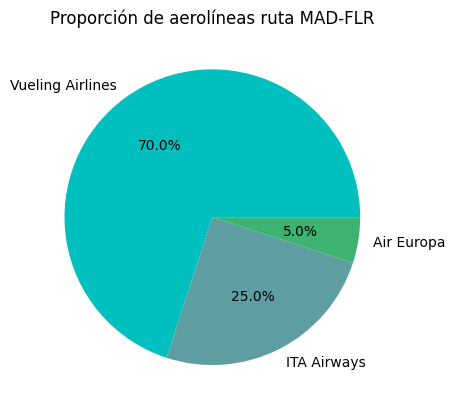

In [188]:
plt.pie(cantidad_vuelos, labels=aerolineas, data=df_vuelos_florencia, autopct='%1.1f%%', colors=colores1)
plt.title('Proporción de aerolíneas ruta MAD-FLR')

In [189]:
cantidad_vuelos_lis = df_vuelos_lisboa['Aerolínea'].value_counts()
aerolineas_lis = df_vuelos_lisboa['Aerolínea'].unique()

Text(0.5, 1.0, 'Proporción de vuelos MAD-LIS')

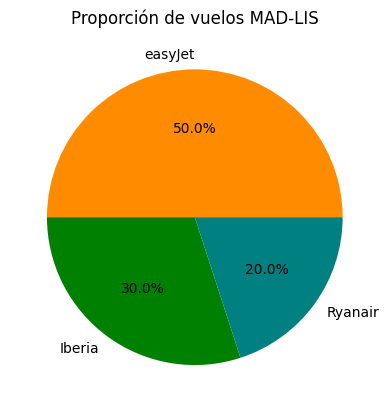

In [190]:
plt.pie(cantidad_vuelos_lis, labels=aerolineas_lis, data=df_vuelos_lisboa, autopct='%1.1f%%', colors=colores2)
plt.title('Proporción de vuelos MAD-LIS')

C:\Users\DELL\AppData\Local\Temp\ipykernel_19852\3684418596.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Aerolínea",


Text(0.5, 1.0, 'Costo promedio por aerolínea MAD-FLR')

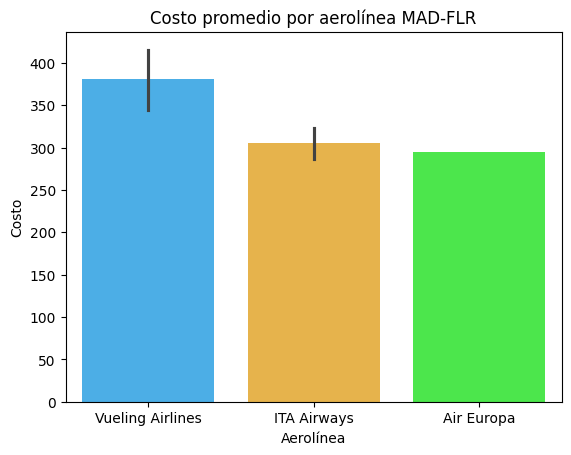

In [191]:
sns.barplot(x = "Aerolínea", 
              y = 'Costo',
              data = df_vuelos_florencia, 
              palette=["#33B5FF", "#FFBB33", '#33FF33'])
plt.title('Costo promedio por aerolínea MAD-FLR')

Tengo la media de las dos principales aerolíneas, pero Air Europa no cuenta como media porque solo aparece una vez dentro de un paquete.

C:\Users\DELL\AppData\Local\Temp\ipykernel_19852\1910303931.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Aerolínea",


Text(0.5, 1.0, 'Costo promedio por aerolínea MAD-LIS')

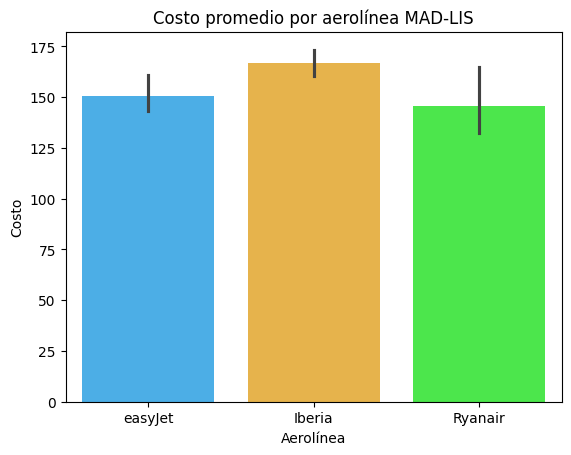

In [192]:
sns.barplot(x = "Aerolínea", 
              y = 'Costo',
              data = df_vuelos_lisboa, 
              palette=["#33B5FF", "#FFBB33", '#33FF33'])
plt.title('Costo promedio por aerolínea MAD-LIS')

Text(0.5, 1.0, 'Número de paradas por aerolínea MAD-FLR')

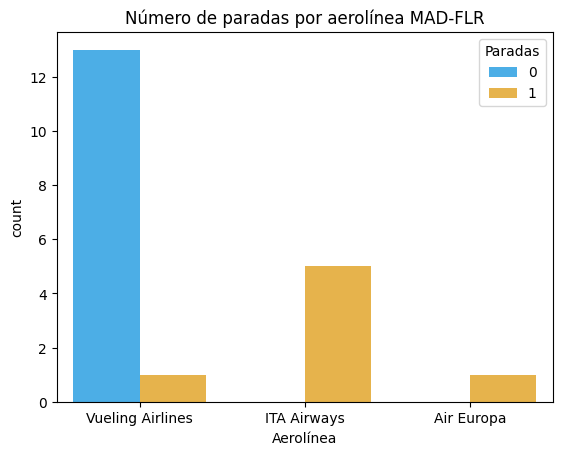

In [193]:
sns.countplot(x = "Aerolínea", 
              data = df_vuelos_florencia, 
              palette=["#33B5FF", "#FFBB33"], 
              hue = "Paradas")
plt.title('Número de paradas por aerolínea MAD-FLR')

Este gráfico demuestra que para Florencia puedo tomar en cuenta las paradas y el tiempo de vuelo como se ve afectado. Solo lo hago para Florencia porque el Lisboa, todos los vuelos encontrados son directos

*Hospedajes

Debajo mostraré la relación que existe entre los precios de hospedaje de ambas ciudades y su calificación (en base 10).

<Axes: xlabel='Calificación', ylabel='Precio'>

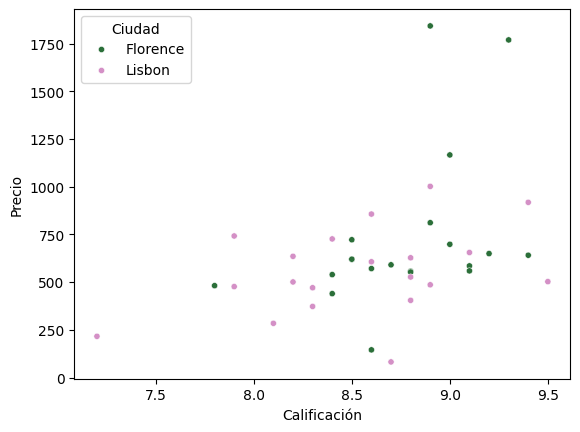

In [195]:
sns.scatterplot(x = "Calificación", # variable que queremos en el eje x
                y = "Precio", # variable que queremos en el eje y
                data = df_florencia_lisboa, # conjunto de datos de donde vienen los datos
                hue = "Ciudad", # de que queremos que dependa el color de los puntos
                palette= "cubehelix", # color de los puntos
                s = 20) # tamaño de los puntos

C:\Users\DELL\AppData\Local\Temp\ipykernel_19852\321086437.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Ciudad",


Text(0.5, 1.0, 'Boxpot por ciudades')

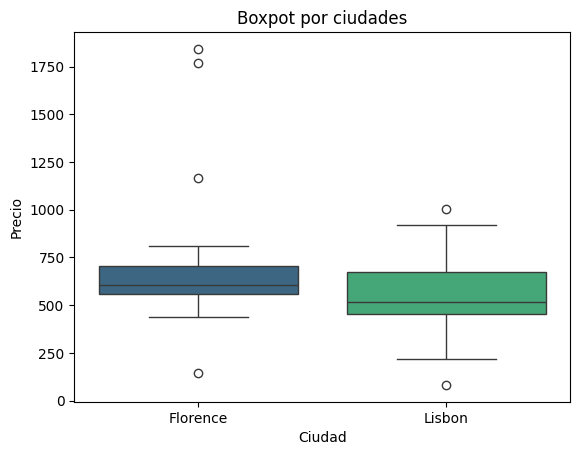

In [197]:
sns.boxplot(x = "Ciudad",
            y = "Precio",
            data = df_florencia_lisboa, 
            palette = 'viridis');
plt.title('Boxpot por ciudades')

# anotaciones

C:\Users\DELL\AppData\Local\Temp\ipykernel_19852\1179630194.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Ciudad",
C:\Users\DELL\AppData\Local\Temp\ipykernel_19852\1179630194.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x = "Ciudad",


Text(0.5, 1.0, 'Media de precio por los tres días')

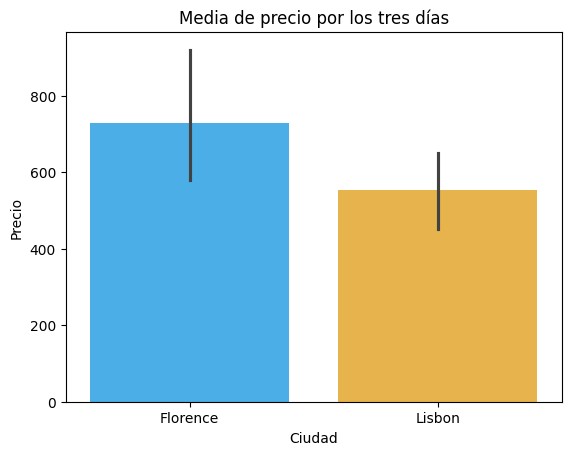

In [201]:
sns.barplot(x = "Ciudad", 
              y = 'Precio',
              data = df_florencia_lisboa, 
              palette=["#33B5FF", "#FFBB33", '#33FF33'])
plt.title('Media de precio por los tres días')